# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [ ]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightblue'})
import datetime as dt

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Setting global constants to ensure notebook results are reproducible

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [ ]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

In [ ]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [ ]:
df_train.shape

(8763, 49)

In this dataset there are 8763 rows and 49 columns

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

There are several observations that can be seen here;

*   The time column is registered as an object with regards to it's datatype.
*   Seville_pressure, unlike any other registered pressures is of the object datatype
*   Valencia_pressure seems to have some missing values as it's total non-null values are 6695 instead of 8763 as the rest of the features.
*   The Unnamed: 0 column seems to serve the same purpose as the index, we can do without it.



In [ ]:
#drop the 'Unnamed: 0' column
df_train = df_train.drop('Unnamed: 0', axis=1)
df_train.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


In [ ]:
#a closer look at 'time', 'Seville_pressure' and 'Valencia_pressure'
df_train[['time', 'Seville_pressure', 'Valencia_pressure']].head()

,time,Seville_pressure,Valencia_pressure
0,2015-01-01 03:00:00,sp25,1002.666667
1,2015-01-01 06:00:00,sp25,1004.333333
2,2015-01-01 09:00:00,sp25,1005.333333
3,2015-01-01 12:00:00,sp25,1009.000000
4,2015-01-01 15:00:00,sp25,NaN


The following can be observed here;


*   The 'time' column can be converted to a datetimestamp datatype for us to work better with it.
*   The 'Seville_pressure' column seems to be a variable-character type. Investigation to be made why that is.
*   Lastly, the column 'Valencia_pressure' shows that indeed it may contain some missing values.



In [ ]:
#check how many missing values are in the 'Valencia_pressure' column
print('There are',df_train.Valencia_pressure.isnull().sum(), 'missing values in the dataset')

There are 2068 missing values in the dataset


In [ ]:
#copying dataframe before dropping the Valencia_pressure column
df = df_train.copy()

In [ ]:
#for the sake of creating our base model without imputing data, we will drop the 'Valencia_pressure' column
df_train = df_train.drop('Valencia_pressure', axis=1)

In [ ]:
#for us to be able to view the entire dataset's columns, we need to maximise the display of pandas' columns
pd.set_option('display.max_columns', 0)
df_train.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,304.150000,1022.000000,297.248333,296.056667,801.666667,299.620333,81.333333,294.820000,296.855000,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.1666

From here it is worth noting that Barcelona_pressure may have some outliers or the figures are simply just too high, higher than any pressure that has ever been recorded (1083.8mb).

In [ ]:
df_train.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


In [ ]:
#To help us investigate how many entries are beyond normal recordings
barc_normal_pressure = pd.DataFrame([df_train['Barcelona_pressure']<1083.8])
#we Transpose the DataFrame to count the values of the True and False observations
barc_normal_pressure.T.value_counts()

Barcelona_pressure
True                  8745
False                   18
dtype: int64

This proves that there is a total of 18 outliers in the 'Barcelona_pressure' column

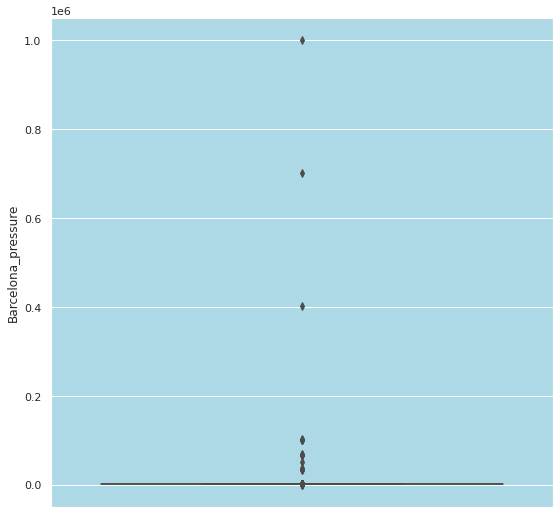

In [ ]:
#a box plot to help visualise these outliers
fig, ax = plt.subplots(figsize=(9,9))
sns.boxplot(y='Barcelona_pressure', data=df_train, color='red', ax=ax)

The outliers are distorting the boxplot from displaying its visualisation prowess

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


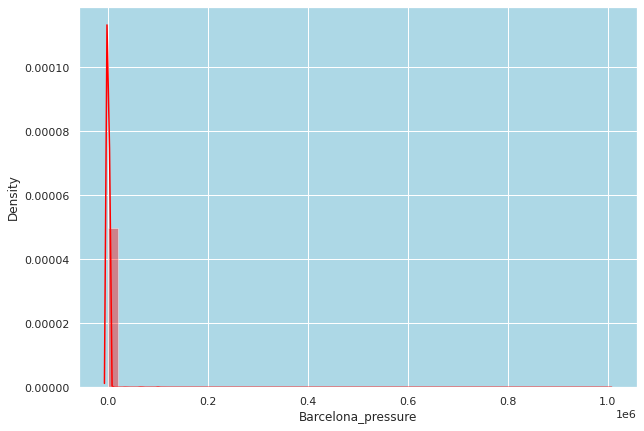

In [ ]:
#let's try a distribution plot instead
fig, ax = plt.subplots(figsize=(10,7))
sns.distplot(df_train['Barcelona_pressure'],color='red', kde=True, ax=ax)

The Barcelona Pressure is concentrated around the same values. We will explore these values more in the data engineering phase to check if they need to be standardised or normalised.

###Explore the Data with regards to time

In [ ]:
df_train['time'] = pd.to_datetime(df_train['time'], format='%Y-%m-%d %H:%M:%S.%f')
df_train['year'] = df_train['time'].dt.year
df_train['month'] = df_train['time'].dt.month
df_train['week'] = df_train['time'].dt.week
df_train['day'] = df_train['time'].dt.day
df_train['hour'] = df_train['time'].dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
df_train[['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Barcelona_wind_speed', 'Seville_wind_speed']].describe()

,Madrid_wind_speed,Valencia_wind_speed,Bilbao_wind_speed,Barcelona_wind_speed,Seville_wind_speed
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,2.586272,1.850356,2.870497,2.425045
std,1.850371,2.411190,1.695888,1.792197,1.672895
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.666667,1.666667,1.000000
50%,2.000000,1.666667,1.000000,2.666667,2.000000
75%,3.333333,3.666667,2.666667,4.000000,3.333333
max,13.000000,52.000000,12.666667,12.666667,11.666667


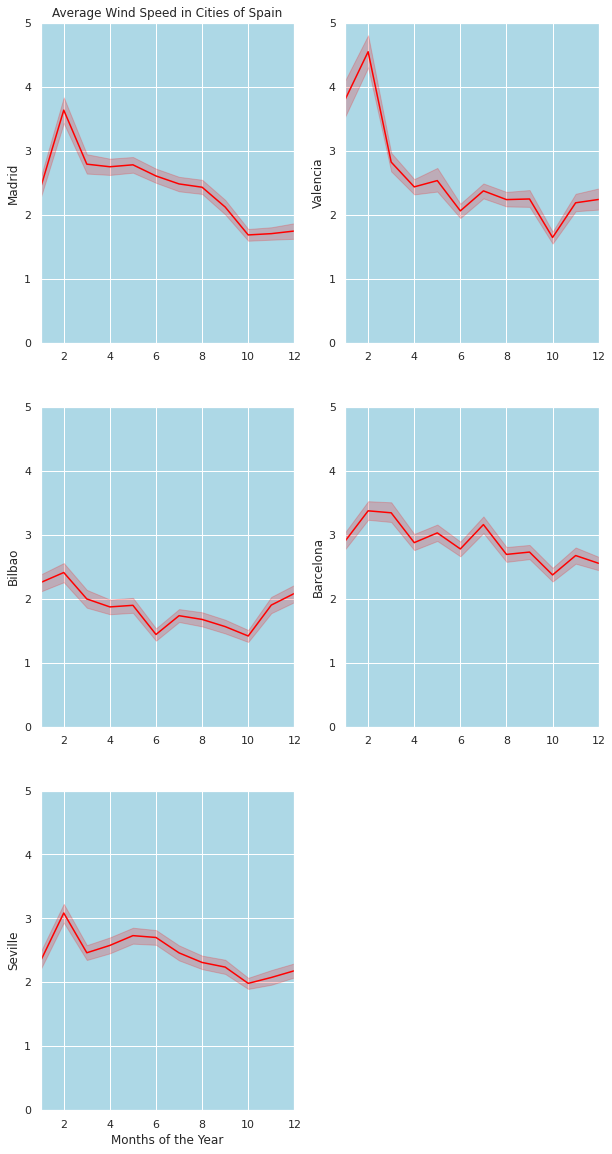

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(10,20))
ax[0,0]= sns.lineplot(x='month', y='Madrid_wind_speed', data=df_train, ax=ax[0,0], color='red')
ax[0,0].set_title('Average Wind Speed in Cities of Spain')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Madrid')
ax[0,0].set_xlim(1, 12)
ax[0,0].set_ylim(0, 5)
ax[0,1]= sns.lineplot(x='month', y='Valencia_wind_speed', data=df_train, ax=ax[0,1], color='red')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('Valencia')
ax[0,1].set_xlim(1, 12)
ax[0,1].set_ylim(0, 5)
ax[1,0]= sns.lineplot(x='month', y='Bilbao_wind_speed', data=df_train, ax=ax[1,0], color='red')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Bilbao')
ax[1,0].set_xlim(1, 12)
ax[1,0].set_ylim(0, 5)
ax[1,1]= sns.lineplot(x='month', y='Barcelona_wind_speed', data=df_train, ax=ax[1,1], color='red')
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('Barcelona')
ax[1,1].set_xlim(1, 12)
ax[1,1].set_ylim(0, 5)
ax[2,0]= sns.lineplot(x='month', y='Seville_wind_speed', data=df_train, ax=ax[2,0], color='red')
ax[2,0].set_xlabel('Months of the Year')
ax[2,0].set_ylabel('Seville')
ax[2,0].set_xlim(1, 12)
ax[2,0].set_ylim(0, 5)
ax[2,1].set_visible(False)

According to the wind readings in Spain, small wind turbines could be a fitting solution to assist with power throughout the year as a minimum of 2m/s is what is required to get these running. Although a concern of there being an outlier in the Valencia_wind_speed column, hopefully standardising the data will solve this.

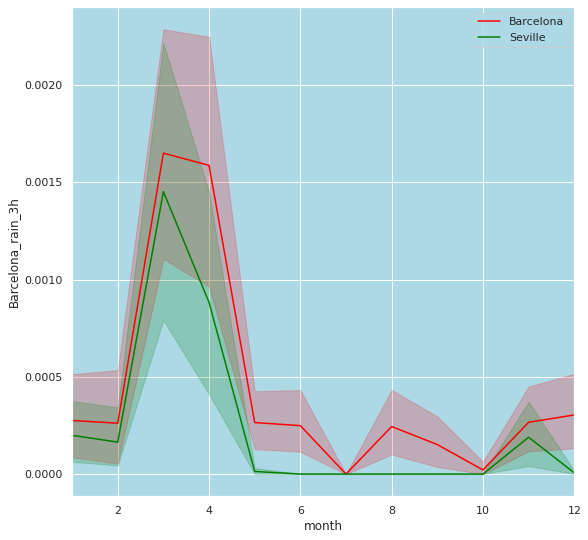

In [ ]:
fig, ax = plt.subplots( figsize=(9,9))
sns.lineplot(x='month', y='Barcelona_rain_3h', data=df_train, label='Barcelona', color='red', ax=ax)
sns.lineplot(x='month', y='Seville_rain_3h', data=df_train, label='Seville', color='green', ax=ax)
ax.set_xlim(1, 12)
ax.legend()

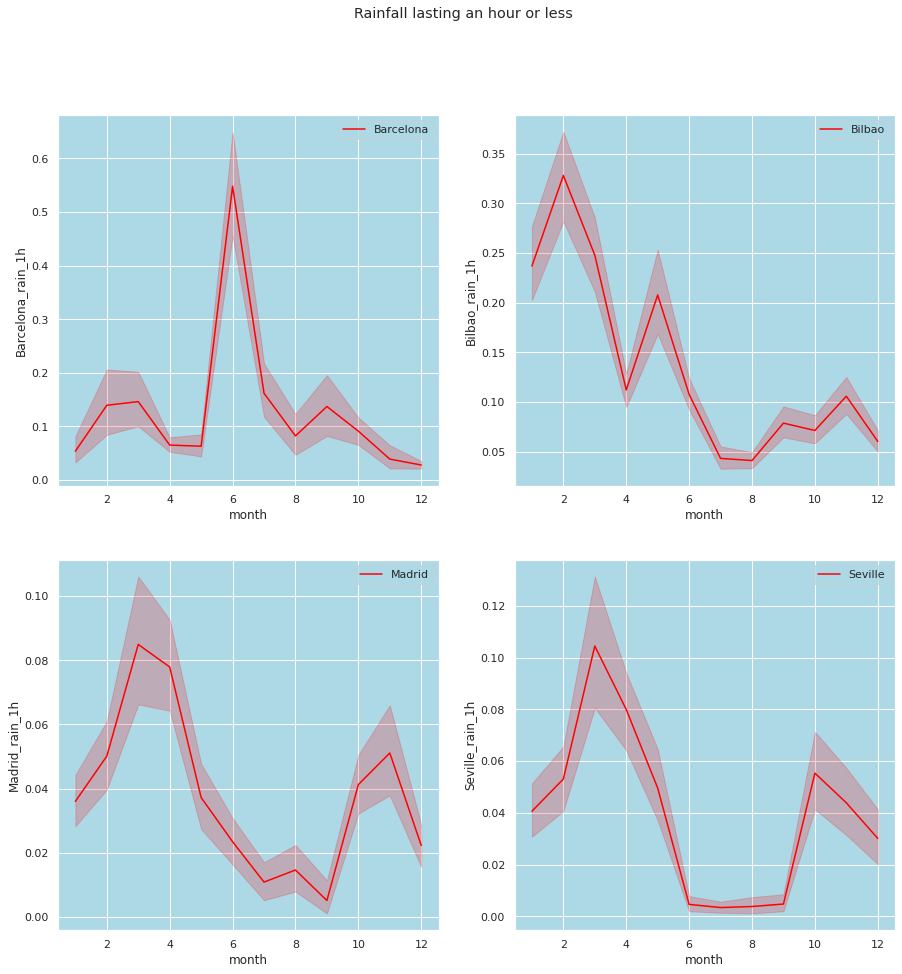

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
fig.suptitle('Rainfall lasting an hour or less')
ax[0,0] = sns.lineplot(x='month', y='Barcelona_rain_1h', data=df_train, label='Barcelona', ax=ax[0,0], color='red')
ax[0,1] = sns.lineplot(x='month', y='Bilbao_rain_1h', data=df_train, label='Bilbao', ax=ax[0,1], color='red')
ax[1,0] = sns.lineplot(x='month', y='Madrid_rain_1h', data=df_train, label='Madrid', ax=ax[1,0], color='red')
ax[1,1] = sns.lineplot(x='month', y='Seville_rain_1h', data=df_train, label='Seville', ax=ax[1,1], color='red')

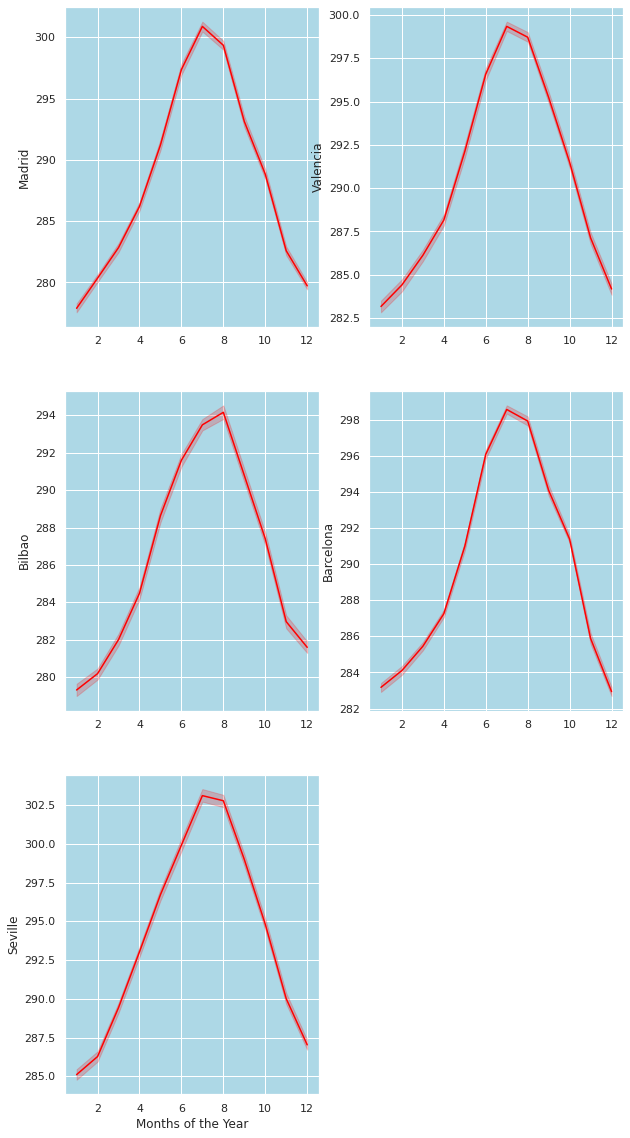

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(10,20))
ax[0,0]= sns.lineplot(x='month', y='Madrid_temp', data=df_train, ax=ax[0,0], color='red')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Madrid')
ax[0,1]= sns.lineplot(x='month', y='Valencia_temp', data=df_train, ax=ax[0,1], color='red')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('Valencia')
ax[1,0]= sns.lineplot(x='month', y='Bilbao_temp', data=df_train, ax=ax[1,0], color='red')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Bilbao')
ax[1,1]= sns.lineplot(x='month', y='Barcelona_temp', data=df_train, ax=ax[1,1], color='red')
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('Barcelona')
ax[2,0]= sns.lineplot(x='month', y='Seville_temp', data=df_train, ax=ax[2,0], color='red')
ax[2,0].set_xlabel('Months of the Year')
ax[2,0].set_ylabel('Seville')
ax[2,1].set_visible(False)

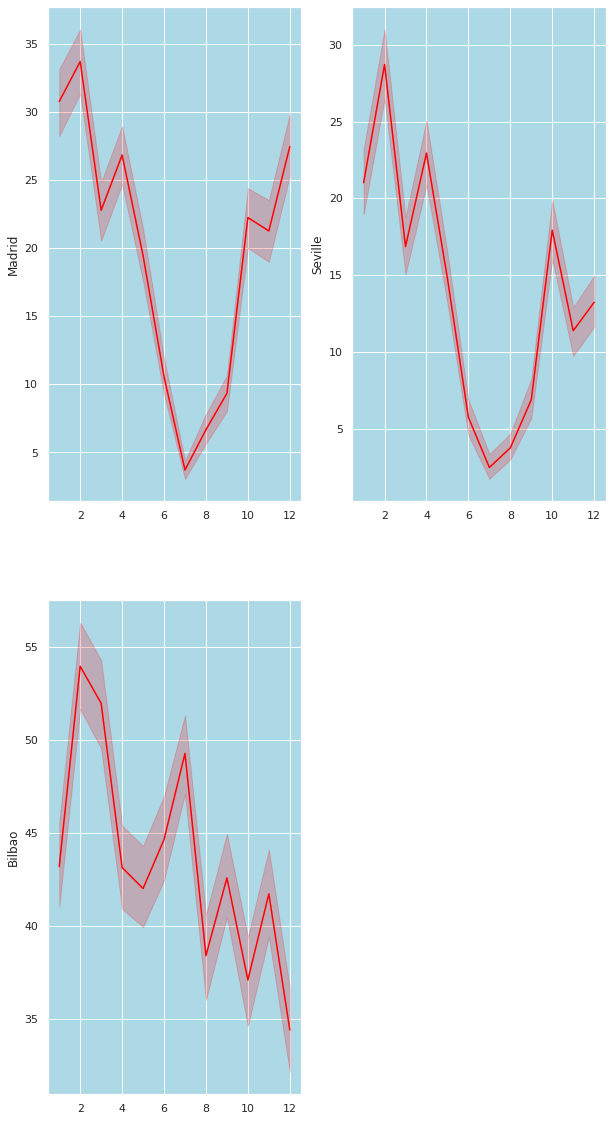

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(10,20))
ax[0,0]= sns.lineplot(x='month', y='Madrid_clouds_all', data=df_train, ax=ax[0,0], color='red')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Madrid')
ax[0,1]= sns.lineplot(x='month', y='Seville_clouds_all', data=df_train, ax=ax[0,1], color='red')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('Seville')
ax[1,0]= sns.lineplot(x='month', y='Bilbao_clouds_all', data=df_train, ax=ax[1,0], color='red')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Bilbao')
ax[1,1].set_visible(False)

These may need to be replaced with the mode. This suggests that we may need to check the rest of the numeric columns for outliers.

In [ ]:
#Kurtosis is the best for checking for outliers. Any kurtosis value greater 3
Kurtosis = pd.DataFrame(df_train.drop(['day', 'hour', 'week', 'month', 'year'], axis=1).kurtosis())
Kurtosis.columns = ['Kurtosis_Weight']
Kurtosis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Kurtosis_Weight
Madrid_wind_speed,2.036462
Bilbao_rain_1h,32.904656
Valencia_wind_speed,35.645426
Seville_humidity,-1.017983
Madrid_humidity,-1.167537
Bilbao_clouds_all,-1.533417
Bilbao_wind_speed,3.631565
Seville_clouds_all,2.155921
Bilbao_wind_deg,-1.083530
Barcelona_wind_speed,1.493635


For this basic model I will only use those features who's Kurtosis Weight is less than 3 as those are the ones I am certain have no possibility of having outliers.

In [ ]:
#base model features
bmf = Kurtosis['Kurtosis_Weight'][Kurtosis['Kurtosis_Weight'] < 3]
bmf = pd.DataFrame(bmf)
#to get only the column names stored in bmf_names
bmf_names = bmf.T.columns
#sorting out the columns names in alphabetical order
bmf_sorted_names = bmf_names.sort_values()

In [ ]:
bmf_data = df_train[bmf_sorted_names]
bmf_data.head()

,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_weather_id,Bilbao_wind_deg,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_temp,Valencia_temp_max,Valencia_temp_min,load_shortfall_3h
0,281.013000,281.013000,281.013000,42.666667,6.333333,0.0,1035.000000,269.338615,269.338615,269.338615,800.0,223.333333,0.0,64.000000,971.333333,265.938000,265.938000,265.938000,0.666667,0.0,74.333333,274.254667,274.254667,274.254667,3.333333,75.666667,269.888000,269.888000,269.888000,6715.666667
1,280.561667,280.561667,280.561667,139.000000,4.000000,0.0,1035.666667,270.376000,270.376000,270.376000,800.0,221.000000,0.0,64.666667,972.666667,266.386667,266.386667,266.386667,0.333333,0.0,78.333333,274.945000,274.945000,274.945000,3.333333,71.000000,271.728333,271.728333,271.728333,4171.666667
2,281.583667,281.583667,281.583667,326.000000,2.000000,0.0,1036.000000,275.027229,275.027229,275.027229,800.0,214.333333,0.0,64.333333,974.000000,272.708667,272.708667,272.708667,1.000000,0.0,71.333333,278.792000,278.792000,278.792000,2.666667,65.666667,278.008667,278.008667,278.008667,4274.666667
3,283.434104,283.434104,283.434104,273.000000,2.333333,0.0,1036.000000,281.135063,281.135063,281.135063,800.0,199.666667,0.0,56.333333,994.666667,281.895219,281.895219,281.895219,1.000000,0.0,65.333333,285.394000,285.394000,285.394000,4.000000,54.000000,284.899552,284.899552,284.899552,5075.666667
4,284.213167,284.213167,284.213167,260.000000,4.333333,2.0,1035.333333,282.252063,282.252063,282.252063,800.0,185.000000,0.0,57.000000,1035.333333,280.678437,280.678437,280.678437,1.000000,0.0,59.000000,285.513719,285.513719,285.513719,3.000000,58.333333,283.015115,283.015115,283.015115,6620.666667


Bilbao_weather_id does not seem to communicate anything significant to a potential model as id columns' tend not to be.

In [ ]:
#we are dropping the 'Bilbao_weather_id'
bmf_data = bmf_data.drop('Bilbao_weather_id', axis=1)

In [ ]:
bmf_data.shape

(8763, 29)

In [ ]:
bmf_data.describe()

,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_wind_deg,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_temp,Valencia_temp_max,Valencia_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,289.855459,291.157644,288.447422,190.544848,2.870497,43.469132,1017.739549,286.422929,287.966027,285.017973,158.957511,19.473392,57.414717,1010.316920,288.419439,289.540309,287.202203,2.425729,13.714748,62.658793,293.978903,297.479527,291.633356,2.425045,65.247727,290.592152,291.337233,289.867648,10673.857612
std,6.528111,7.273538,6.102593,89.077337,1.792197,32.551044,10.046124,6.818682,7.105590,6.705672,102.056299,28.053660,24.335396,22.198555,9.346796,9.752047,9.206237,1.850371,24.272482,22.621226,7.920986,8.875812,8.178220,1.672895,19.262322,7.162274,7.565692,6.907402,5218.046404
min,270.816667,272.150000,269.483333,0.000000,0.000000,0.000000,971.333333,267.483333,269.063000,264.483333,0.000000,0.000000,6.333333,927.666667,264.983333,264.983333,264.983333,0.000000,0.000000,8.333333,272.063000,272.063000,270.150000,0.000000,10.333333,269.888000,269.888000,269.888000,-6618.000000
25%,284.973443,285.483333,284.150000,118.166667,1.666667,10.000000,1013.000000,281.374167,282.836776,280.085167,73.333333,0.000000,36.333333,1012.333333,281.404281,282.150000,280.299167,1.000000,0.000000,44.333333,288.282917,291.312750,285.816667,1.000000,51.333333,285.150000,285.550167,284.783333,7390.333333
50%,289.416667,290.150000,288.150000,200.000000,2.666667,45.000000,1019.000000,286.158333,287.630000,284.816667,147.000000,0.000000,58.000000,1017.333333,287.053333,288.116177,286.083333,2.000000,0.000000,65.666667,293.323333,297.101667,290.816667,2.000000,67.000000,290.176667,291.037000,289.550000,11114.666667
75%,294.909000,296.855000,292.966667,260.000000,4.000000,75.000000,1024.000000,291.034167,292.483333,289.816667,234.000000,33.333333,78.666667,1022.000000,295.154667,296.816667,293.884500,3.333333,20.000000,82.000000,299.620333,304.150000,297.150000,3.333333,81.333333,296.056667,297.248333,294.820000,14498.166667
max,307.316667,314.076667,304.816667,360.000000,12.666667,100.000000,1042.000000,310.710000,317.966667,309.816667,359.333333,100.000000,100.000000,1038.000000,313.133333,314.483333,310.383333,13.000000,97.333333,100.000000,314.976667,320.483333,314.816667,11.666667,100.000000,310.426667,314.263333,310.272000,31904.000000


In [ ]:
# evaluate correlation
bmf_data.corr()

,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_wind_deg,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_temp,Valencia_temp_max,Valencia_temp_min,load_shortfall_3h
Barcelona_temp,1.000000,0.974480,0.964089,-0.189016,0.116240,-0.023171,-0.229760,0.865705,0.831470,0.867434,0.068701,-0.223940,-0.684867,0.010542,0.903143,0.900428,0.868222,0.080133,-0.186463,-0.617797,0.852651,0.693193,0.873170,0.085395,-0.247168,0.914601,0.912094,0.892024,0.182673
Barcelona_temp_max,0.974480,1.000000,0.885911,-0.151302,0.114497,-0.034040,-0.217623,0.867268,0.844563,0.854620,0.049775,-0.242409,-0.691803,0.072290,0.896766,0.906248,0.847888,0.061854,-0.205060,-0.606770,0.866389,0.738489,0.862597,0.068902,-0.221430,0.901400,0.918256,0.860510,0.164734
Barcelona_temp_min,0.964089,0.885911,1.000000,-0.226583,0.109268,-0.010804,-0.230942,0.810785,0.764031,0.831224,0.086482,-0.188578,-0.636777,-0.068083,0.853881,0.836680,0.838985,0.089992,-0.153412,-0.595065,0.779252,0.586923,0.831689,0.097407,-0.266820,0.874447,0.845057,0.879687,0.195984
Barcelona_wind_deg,-0.189016,-0.151302,-0.226583,1.000000,0.076376,-0.065120,0.123565,-0.164656,-0.147388,-0.182302,-0.015481,-0.041083,0.183725,0.093900,-0.211319,-0.193487,-0.211010,-0.095380,-0.031373,0.164064,-0.159882,-0.083393,-0.195212,-0.098837,0.045277,-0.201419,-0.170304,-0.228330,-0.116133
Barcelona_wind_speed,0.116240,0.114497,0.109268,0.076376,1.000000,0.094019,-0.083399,0.120361,0.109692,0.123403,0.177393,0.147652,-0.058518,-0.020364,0.089365,0.084209,0.084679,0.294640,0.136591,-0.138625,0.147628,0.152852,0.130367,0.212193,-0.249610,0.121330,0.138254,0.097663,-0.103633
Bilbao_clouds_all,-0.023171,-0.034040,-0.010804,-0.065120,0.094019,1.000000,0.000377,-0.114118,-0.158014,-0.067731,0.280154,0.109788,0.041878,-0.135672,-0.046686,-0.048491,-0.046189,0.244001,0.046737,0.061680,-0.095003,-0.102322,-0.077417,0.075066,-0.129684,-0.000299,0.002621,-0.003806,-0.127293
Bilbao_pressure,-0.229760,-0.217623,-0.230942,0.123565,-0.083399,0.000377,1.000000,-0.250325,-0.221529,-0.267415,-0.107361,-0.323787,-0.053074,0.434461,-0.156223,-0.139887,-0.160023,-0.231747,-0.330575,-0.099458,-0.114349,-0.054399,-0.150221,-0.132661,-0.028138,-0.174843,-0.186278,-0.157873,0.039052
Bilbao_temp,0.865705,0.867268,0.810785,-0.164656,0.120361,-0.114118,-0.250325,1.000000,0.981624,0.982936,0.065396,-0.174079,-0.634825,0.092394,0.875271,0.872234,0.838195,0.060467,-0.152393,-0.604733,0.839014,0.703218,0.842972,0.082904,-0.260946,0.854892,0.854592,0.832393,0.176411
Bilbao_temp_max,0.831470,0.844563,0.764031,-0.147388,0.109692,-0.158014,-0.221529,0.981624,1.000000,0.932219,0.031187,-0.172921,-0.611395,0.176838,0.843633,0.846887,0.802041,0.042114,-0.165567,-0.583718,0.828099,0.726510,0.808278,0.070808,-0.241397,0.833562,0.837574,0.806606,0.180934
Bilbao_temp_min,0.867434,0.854620,0.831224,-0.182302,0.123403,-0.067731,-0.267415,0.982936,0.932219,1.000000,0.095047,-0.167008,-0.635760,0.009734,0.876185,0.865596,0.845799,0.077330,-0.134249,-0.605493,0.818454,0.651814,0.847007,0.093079,-0.271621,0.847584,0.840573,0.832773,0.172920


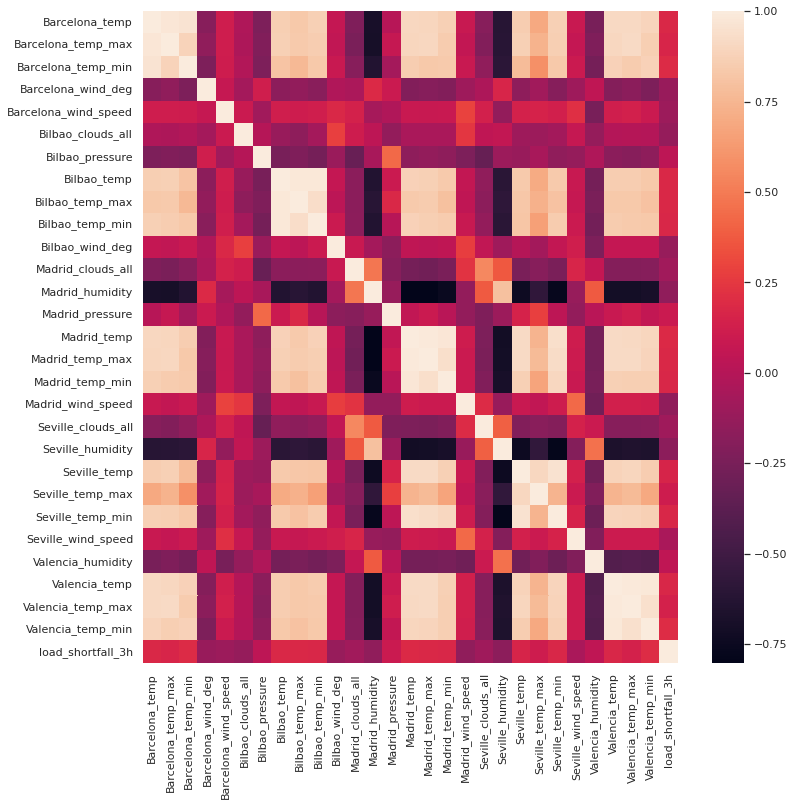

In [ ]:
corr = bmf_data.corr()
#plotting correlation heatmap
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, ax=ax)

From this heatmap we can quickly observe a negative correlation between humidity features against temperature features. These may in-turn cause a multicollinearity in our model.

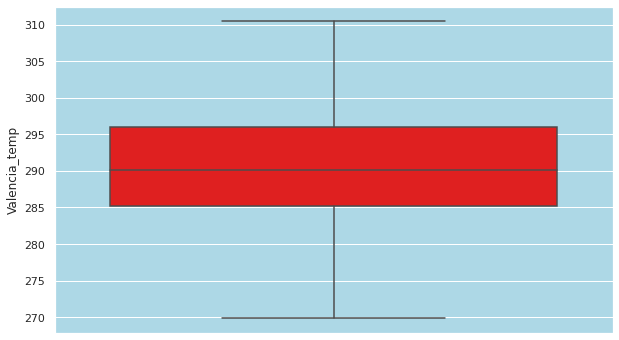

In [ ]:
# plot relevant feature interactions
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=bmf_data['Valencia_temp'], color='red', ax=ax)

Proof that the bmf selected features have no outliers

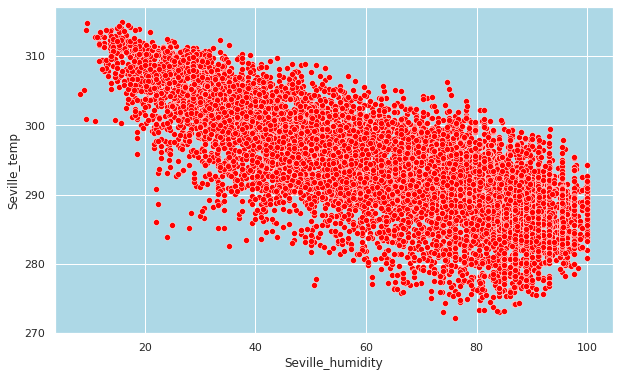

In [ ]:
#Checking for multicollinearity between humidity and temp
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='Seville_humidity', y='Seville_temp', data=bmf_data, color='red', ax=ax)

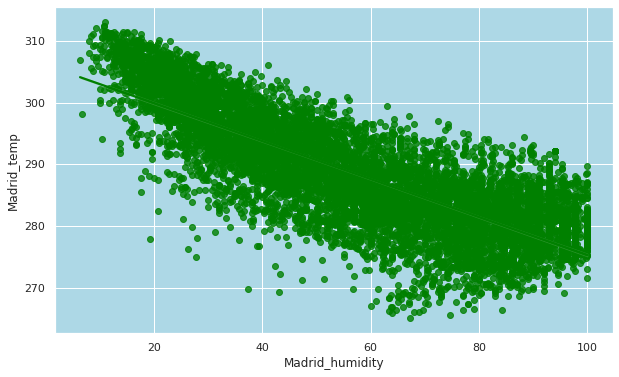

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x='Madrid_humidity', y='Madrid_temp', data=bmf_data, color='green', ax=ax)

As the two above plots infer, humidity and temperature have a negative correlation towards one another even as our potential features. To not confuse the model we may end up droping the temperature columns for those cities that have recorded humidity.

In [ ]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S.%f')

In [ ]:
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['week'] = df['time'].dt.week
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,week,day,hour
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,1,3
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,1,6
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,1,9
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,1,12
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,1,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   Madrid_wind_speed     8763 non-null   float64       
 2   Valencia_wind_deg     8763 non-null   object        
 3   Bilbao_rain_1h        8763 non-null   float64       
 4   Valencia_wind_speed   8763 non-null   float64       
 5   Seville_humidity      8763 non-null   float64       
 6   Madrid_humidity       8763 non-null   float64       
 7   Bilbao_clouds_all     8763 non-null   float64       
 8   Bilbao_wind_speed     8763 non-null   float64       
 9   Seville_clouds_all    8763 non-null   float64       
 10  Bilbao_wind_deg       8763 non-null   float64       
 11  Barcelona_wind_speed  8763 non-null   float64       
 12  Barcelona_wind_deg    8763 non-null   float64       
 13  Madrid_clouds_all 

In [ ]:
col_arranged = ['time', 'year', 'month', 'week', 'day', 'hour', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id','Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h']
df = df.reindex(col_arranged, axis=1)
df.head()

,time,year,month,week,day,hour,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,2015,1,1,1,3,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,2015,1,1,1,6,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,2015,1,1,1,9,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,2015,1,1,1,12,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,2015,1,1,1,15,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


Looking at the difference between renewable resources and fosil fuel usage during the years does not tell us much but that there was a significant drop in the usage of renewable resources for energy from 2015 to 2016, this started to change in the year 2016 heading towards 2017.

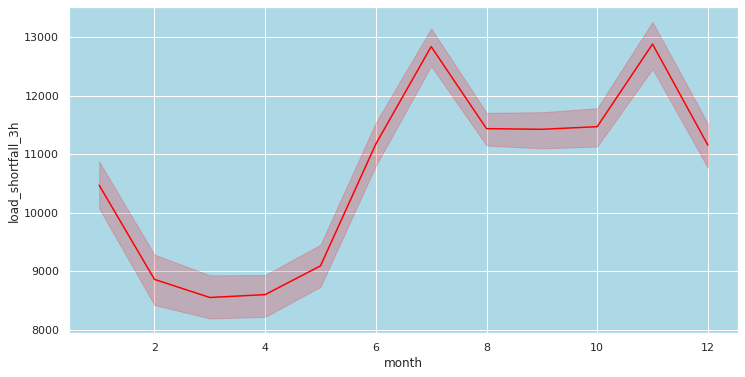

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='month', y='load_shortfall_3h', data=df, color='red', ax=ax)

Through the transition of Winter to Spring(Winter; February-March, Spring; March-June), The use of fosil fuels is extremely high almost matching that of the renewable sources. The peak of renewable sources for energy in Spain is reached in the months of July(mid-Summer) and November(mid-Autumn).

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   year                  8763 non-null   int64         
 2   month                 8763 non-null   int64         
 3   week                  8763 non-null   int64         
 4   day                   8763 non-null   int64         
 5   hour                  8763 non-null   int64         
 6   Madrid_wind_speed     8763 non-null   float64       
 7   Valencia_wind_deg     8763 non-null   object        
 8   Bilbao_rain_1h        8763 non-null   float64       
 9   Valencia_wind_speed   8763 non-null   float64       
 10  Seville_humidity      8763 non-null   float64       
 11  Madrid_humidity       8763 non-null   float64       
 12  Bilbao_clouds_all     8763 non-null   float64       
 13  Bilbao_wind_speed 

In [ ]:
df[['Madrid_weather_id', 'Barcelona_weather_id', 'Seville_weather_id', 'Bilbao_weather_id']].describe()

,Madrid_weather_id,Barcelona_weather_id,Seville_weather_id,Bilbao_weather_id
count,8763.000000,8763.000000,8763.000000,8763.000000
mean,773.527594,765.979687,774.658818,724.722362
std,77.313315,88.142235,71.940009,115.846537
min,211.000000,200.666667,200.000000,207.333333
25%,800.000000,800.000000,800.000000,700.333333
50%,800.000000,800.333333,800.000000,800.000000
75%,800.666667,801.000000,800.000000,801.666667
max,804.000000,804.000000,804.000000,804.000000


In [ ]:
df_eng = df.drop(df.columns[df.columns.str.endswith('_id')], axis=1)

In [ ]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   year                  8763 non-null   int64         
 2   month                 8763 non-null   int64         
 3   week                  8763 non-null   int64         
 4   day                   8763 non-null   int64         
 5   hour                  8763 non-null   int64         
 6   Madrid_wind_speed     8763 non-null   float64       
 7   Valencia_wind_deg     8763 non-null   object        
 8   Bilbao_rain_1h        8763 non-null   float64       
 9   Valencia_wind_speed   8763 non-null   float64       
 10  Seville_humidity      8763 non-null   float64       
 11  Madrid_humidity       8763 non-null   float64       
 12  Bilbao_clouds_all     8763 non-null   float64       
 13  Bilbao_wind_speed 

As identified before, Valencia pressure has some missing values. If they exceed our set threshold of **25%** we will have to drop the variable, if not then the appropriate mode or mean will be applied to the missing values. Since the mean is subject to outliers we would rather use the mode.

In [ ]:
print("{0:.2f}%".format(round(df['Valencia_pressure'].isnull().sum() / 8763 *100, 2)))

23.60%


The missing values do not exceed nor reach our set threshold of **25%**, in that case we will keep them.

In [ ]:
df_eng['Valencia_wind_deg'].value_counts()

level_1     1072
level_5      915
level_4      914
level_3      890
level_7      882
level_6      881
level_2      874
level_10     839
level_8      798
level_9      698
Name: Valencia_wind_deg, dtype: int64

In [ ]:
df_eng['Seville_pressure'].value_counts()

sp13    500
sp10    460
sp8     418
sp6     411
sp25    410
sp21    408
sp24    405
sp4     404
sp17    401
sp18    395
sp22    392
sp16    392
sp12    378
sp5     372
sp19    357
sp20    340
sp23    339
sp15    326
sp2     325
sp3     309
sp1     270
sp14    255
sp9     183
sp7     174
sp11    139
Name: Seville_pressure, dtype: int64

In [ ]:
df_eng['Seville_pressure'] = df_eng['Seville_pressure'].map(lambda x: x.lstrip('sp'))

In [ ]:
df_eng['Seville_pressure'].value_counts()

13    500
10    460
8     418
6     411
25    410
21    408
24    405
4     404
17    401
18    395
22    392
16    392
12    378
5     372
19    357
20    340
23    339
15    326
2     325
3     309
1     270
14    255
9     183
7     174
11    139
Name: Seville_pressure, dtype: int64

In [ ]:
# remove missing values/ features

In [ ]:
categorical_cols = [i for i in df_eng.drop('load_shortfall_3h', axis=1).columns if df_eng.drop('load_shortfall_3h', axis=1)[i].nunique() < 11 and df_eng.drop('load_shortfall_3h', axis=1)[i].dtype == "object"]
numerical_cols = [i for i in df_eng.drop('load_shortfall_3h', axis=1).columns if df_eng.drop('load_shortfall_3h', axis=1)[i].dtype in ['int64', 'float64']]

In [ ]:
numerical_transformer = SimpleImputer(strategy='constant')
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_cols), ('cat', categorical_transformer, categorical_cols)])

In [ ]:
model = XGBRegressor(n_estimators=300, learning_rate=0.05)
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

In [ ]:
x_pipe = df_eng.drop('load_shortfall_3h', axis=1)
y_pipe = df_eng['load_shortfall_3h']

In [ ]:
x_pipe_train, x_pipe_test, y_pipe_train, y_pipe_test = train_test_split(x_pipe, y_pipe, test_size=0.2, random_state=12)

In [ ]:
my_pipeline.fit(x_pipe_train, y_pipe_train)

[10:18:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['year', 'month', 'week',
                                                   'day', 'hour',
                                                   'Madrid_wind_speed',
                                                   'Bilbao_rain_1h',
                                                   'Valencia_wind_speed',
                                                   'Seville_humidity',
                                                   'Madrid_humidity',
                                                   'Bilbao_clouds_all',
                                                   'Bilbao_wind_speed',
                                                   'Seville_clouds_all',
                                                   'Bilbao_wind_deg',
                                       

In [ ]:
my_pipeline.score(x_pipe_train, y_pipe_train)

0.6406208245486209

In [ ]:
my_pipeline.score(x_pipe_test, y_pipe_test)

0.5646661191934309

In [ ]:
df_test = df_test.drop('Unnamed: 0', axis=1)

In [ ]:
df_test['time'] = pd.to_datetime(df_test['time'], format='%Y-%m-%d %H:%M:%S.%f')

In [ ]:
df_test['year'] = df_test['time'].dt.year
df_test['month'] = df_test['time'].dt.month
df_test['week'] = df_test['time'].dt.week
df_test['day'] = df_test['time'].dt.day
df_test['hour'] = df_test['time'].dt.hour
col_arranged = ['time', 'year', 'month', 'week', 'day', 'hour', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id','Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h']
df_test = df_test.reindex(col_arranged, axis=1)
df_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,time,year,month,week,day,hour,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2018-01-01 00:00:00,2018,1,1,1,0,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,NaN
1,2018-01-01 03:00:00,2018,1,1,1,3,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,NaN
2,2018-01-01 06:00:00,2018,1,1,1,6,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,NaN
3,2018-01-01 09:00:00,2018,1,1,1,9,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,NaN
4,2018-01-01 12:00:00,2018,1,1,1,12,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,NaN


In [ ]:
df_eng_test = df_test.drop(df_test.columns[df_test.columns.str.endswith('_id')], axis=1)

In [ ]:
df_eng_test.isnull().sum()

time                       0
year                       0
month                      0
week                       0
day                        0
hour                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Bilbao_pressure            0
Valencia_pressure        454
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp 

In [ ]:
df_eng_test['Seville_pressure'] = df_eng_test['Seville_pressure'].map(lambda x: x.lstrip('sp'))

In [ ]:
df_eng_test.head()

,time,year,month,week,day,hour,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Bilbao_pressure,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2018-01-01 00:00:00,2018,1,1,1,0,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,25,0.0,0,1017.333333,0.0,0.0,0.0,0,1025.666667,NaN,284.483333,1030.000000,287.483333,287.483333,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,NaN
1,2018-01-01 03:00:00,2018,1,1,1,3,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,25,0.0,0,1020.333333,0.0,0.0,0.0,0,1026.666667,NaN,282.483333,1030.333333,284.150000,284.150000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,NaN
2,2018-01-01 06:00:00,2018,1,1,1,6,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,25,0.0,0,1023.000000,0.0,0.0,0.0,0,1025.333333,NaN,280.816667,1030.666667,282.816667,282.816667,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,NaN
3,2018-01-01 09:00:00,2018,1,1,1,9,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,25,0.0,0,1025.666667,0.0,0.0,0.0,0,1025.000000,NaN,281.150000,1032.333333,283.483333,283.483333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,NaN
4,2018-01-01 12:00:00,2018,1,1,1,12,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,25,0.0,0,1026.000000,0.0,0.0,0.0,0,1022.333333,NaN,287.150000,1032.333333,287.150000,287.150000,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,NaN


In [ ]:
x_eng_test = df_eng_test.drop('load_shortfall_3h', axis=1)
df_eng_test['load_shortfall_3h'] = my_pipeline.predict(x_eng_test)

In [ ]:
sub_eng_file = df_eng_test[['time', 'load_shortfall_3h']]
sub_eng_file.to_csv('submission_eng_file.csv', index=False)
sub_eng_file

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10797.818359
1,2018-01-01 03:00:00,5699.797852
2,2018-01-01 06:00:00,4790.997070
3,2018-01-01 09:00:00,8044.641602
4,2018-01-01 12:00:00,11499.906250
...,...,...
2915,2018-12-31 09:00:00,9879.416992
2916,2018-12-31 12:00:00,12591.374023
2917,2018-12-31 15:00:00,11071.790039
2918,2018-12-31 18:00:00,10719.428711


There are now no missing values in our dataset.

In [ ]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   year                  8763 non-null   int64         
 2   month                 8763 non-null   int64         
 3   week                  8763 non-null   int64         
 4   day                   8763 non-null   int64         
 5   hour                  8763 non-null   int64         
 6   Madrid_wind_speed     8763 non-null   float64       
 7   Valencia_wind_deg     8763 non-null   object        
 8   Bilbao_rain_1h        8763 non-null   float64       
 9   Valencia_wind_speed   8763 non-null   float64       
 10  Seville_humidity      8763 non-null   float64       
 11  Madrid_humidity       8763 non-null   float64       
 12  Bilbao_clouds_all     8763 non-null   float64       
 13  Bilbao_wind_speed 

In [ ]:
df_eng[['Valencia_wind_deg', 'Bilbao_wind_deg', 'Barcelona_wind_deg']].head()

,Valencia_wind_deg,Bilbao_wind_deg,Barcelona_wind_deg
0,level_5,223.333333,42.666667
1,level_10,221.000000,139.000000
2,level_9,214.333333,326.000000
3,level_8,199.666667,273.000000
4,level_7,185.000000,260.000000


Include Bilbao_wind_deg and Barcelona_wind_deg in data to be standardised as they should be categorical columns instead they are numeric, this suggests an error in entry and thus inconsistency.

Drop all city humidity columns because they are highly correlated to all temperature columns of their respective cities.

In [ ]:
df_eng = df_eng.drop(df_eng.columns[df_eng.columns.str.endswith('_humidity')], axis=1)

Drop all city max and min temperature columns because they are well addressed by the average temperature column.

In [ ]:
df_eng = df_eng.drop(df_eng.columns[df_eng.columns.str.endswith('_max')], axis=1)

In [ ]:
df_eng = df_eng.drop(df_eng.columns[df_eng.columns.str.endswith('_min')], axis=1)

In [ ]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   year                  8763 non-null   int64         
 2   month                 8763 non-null   int64         
 3   week                  8763 non-null   int64         
 4   day                   8763 non-null   int64         
 5   hour                  8763 non-null   int64         
 6   Madrid_wind_speed     8763 non-null   float64       
 7   Valencia_wind_deg     8763 non-null   object        
 8   Bilbao_rain_1h        8763 non-null   float64       
 9   Valencia_wind_speed   8763 non-null   float64       
 10  Bilbao_clouds_all     8763 non-null   float64       
 11  Bilbao_wind_speed     8763 non-null   float64       
 12  Seville_clouds_all    8763 non-null   float64       
 13  Barcelona_wind_spe

In [ ]:
df_eng[['Barcelona_pressure', 'Bilbao_pressure', 'Madrid_pressure', 'Seville_pressure', 'Valencia_pressure']].head()

,Barcelona_pressure,Bilbao_pressure,Madrid_pressure,Seville_pressure,Valencia_pressure
0,1036.333333,1035.000000,971.333333,sp25,1002.666667
1,1037.333333,1035.666667,972.666667,sp25,1004.333333
2,1038.000000,1036.000000,974.000000,sp25,1005.333333
3,1037.000000,1036.000000,994.666667,sp25,1009.000000
4,1035.000000,1035.333333,1035.333333,sp25,1018.000000


The Seville_pressure seems to be recorded with a different measuring unit or rather categorized as described in the overview. The rest of the other city pressures are recorded as floats with a measuring unit of millibars. This sugests that for our model to be able to compare the city atmospheric pressures, they must be uniform with regards to measuring unit, for this reason we are going to drop the Seville_pressure column.

In [ ]:
df_eng = df_eng.drop(df_eng.columns[df_eng.columns.str.endswith('_pressure')], axis=1)

In [ ]:
# create new features

In [ ]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   year                  8763 non-null   int64         
 2   month                 8763 non-null   int64         
 3   week                  8763 non-null   int64         
 4   day                   8763 non-null   int64         
 5   hour                  8763 non-null   int64         
 6   Madrid_wind_speed     8763 non-null   float64       
 7   Valencia_wind_deg     8763 non-null   object        
 8   Bilbao_rain_1h        8763 non-null   float64       
 9   Valencia_wind_speed   8763 non-null   float64       
 10  Bilbao_clouds_all     8763 non-null   float64       
 11  Bilbao_wind_speed     8763 non-null   float64       
 12  Seville_clouds_all    8763 non-null   float64       
 13  Barcelona_wind_spe

In [ ]:
df_eng = pd.get_dummies(data=df_eng, columns=['Valencia_wind_deg'], drop_first=True)

In [ ]:
df_eng.head()

,time,year,month,week,day,hour,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Barcelona_wind_speed,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Valencia_temp,Seville_temp,Barcelona_temp,Bilbao_temp,Madrid_temp,load_shortfall_3h,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9
0,2015-01-01 03:00:00,2015,1,1,1,3,0.666667,0.0,0.666667,0.0,1.000000,0.0,6.333333,0.0,3.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,269.888000,274.254667,281.013000,269.338615,265.938000,6715.666667,0,0,0,0,1,0,0,0,0
1,2015-01-01 06:00:00,2015,1,1,1,6,0.333333,0.0,1.666667,0.0,1.000000,0.0,4.000000,0.0,3.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271.728333,274.945000,280.561667,270.376000,266.386667,4171.666667,1,0,0,0,0,0,0,0,0
2,2015-01-01 09:00:00,2015,1,1,1,9,1.000000,0.0,1.000000,0.0,1.000000,0.0,2.000000,0.0,2.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,278.008667,278.792000,281.583667,275.027229,272.708667,4274.666667,0,0,0,0,0,0,0,0,1
3,2015-01-01 12:00:00,2015,1,1,1,12,1.000000,0.0,1.000000,0.0,1.000000,0.0,2.333333,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,284.899552,285.394000,283.434104,281.135063,281.895219,5075.666667,0,0,0,0,0,0,0,1,0
4,2015-01-01 15:00:00,2015,1,1,1,15,1.000000,0.0,1.000000,2.0,0.333333,0.0,4.333333,0.0,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,283.015115,285.513719,284.213167,282.252063,280.678437,6620.666667,0,0,0,0,0,0,1,0,0


In [ ]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        8763 non-null   datetime64[ns]
 1   year                        8763 non-null   int64         
 2   month                       8763 non-null   int64         
 3   week                        8763 non-null   int64         
 4   day                         8763 non-null   int64         
 5   hour                        8763 non-null   int64         
 6   Madrid_wind_speed           8763 non-null   float64       
 7   Bilbao_rain_1h              8763 non-null   float64       
 8   Valencia_wind_speed         8763 non-null   float64       
 9   Bilbao_clouds_all           8763 non-null   float64       
 10  Bilbao_wind_speed           8763 non-null   float64       
 11  Seville_clouds_all          8763 non-null   float64     

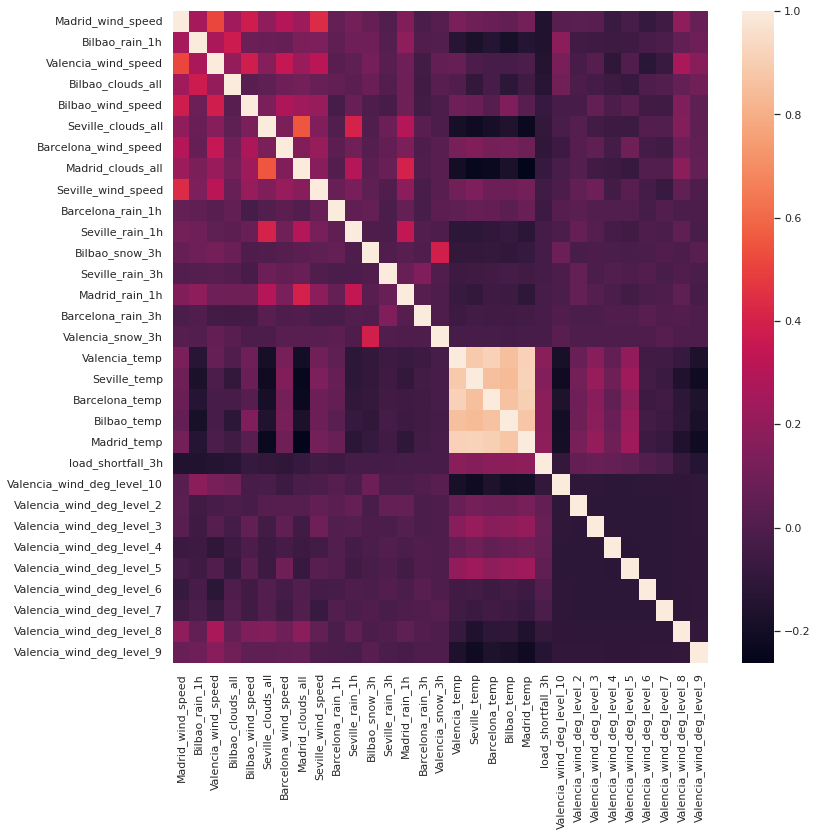

In [ ]:
corr1 = df_eng.drop(['year', 'month', 'week', 'day', 'hour'], axis=1).corr()
#plotting correlation heatmap
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr1, ax=ax)

In [ ]:
corr1

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Barcelona_wind_speed,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Valencia_temp,Seville_temp,Barcelona_temp,Bilbao_temp,Madrid_temp,load_shortfall_3h,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9
Madrid_wind_speed,1.000000,0.259719,0.513092,0.244001,0.377854,0.191251,0.294640,0.230126,0.434104,0.062758,0.108413,0.071183,0.004795,0.150446,-0.014644,0.021660,0.128726,0.090861,0.080133,0.060467,0.109572,-0.150981,0.032800,0.036688,0.031123,-0.069572,-0.030093,-0.085198,-0.050325,0.191565,0.077413
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.370733,0.085398,0.081131,0.069997,0.135524,0.140101,0.052558,0.092984,0.096730,0.016392,0.187423,-0.001412,0.008269,-0.127953,-0.170009,-0.138901,-0.182494,-0.135927,-0.152510,0.177224,-0.040988,-0.054034,-0.059136,-0.050980,-0.023432,-0.011366,0.057474,0.094940
Valencia_wind_speed,0.513092,0.265864,1.000000,0.210524,0.386478,0.163675,0.347966,0.221887,0.316035,0.031804,0.046085,0.115133,0.027637,0.093865,-0.037553,0.058629,0.072366,-0.008508,-0.021456,-0.022676,-0.011982,-0.142791,0.124898,-0.022019,0.022910,-0.102075,0.001583,-0.123371,-0.070596,0.269278,0.169264
Bilbao_clouds_all,0.244001,0.370733,0.210524,1.000000,0.031915,0.046737,0.094019,0.109788,0.075066,0.052913,0.041090,0.080180,0.009557,0.089281,-0.041013,0.024339,-0.000299,-0.095003,-0.023171,-0.114118,-0.046686,-0.127293,0.100229,-0.009630,-0.032252,-0.062309,-0.078950,-0.002957,0.005363,0.066918,0.104366
Bilbao_wind_speed,0.377854,0.085398,0.386478,0.031915,1.000000,0.127344,0.275317,0.239326,0.213420,-0.026640,0.073080,-0.001642,-0.026037,0.088502,-0.038246,-0.008114,0.093919,0.080357,0.018967,0.142435,0.031245,-0.081602,-0.025565,-0.021756,0.053581,-0.011205,0.032332,-0.045576,-0.046302,0.143713,0.043193
Seville_clouds_all,0.191251,0.081131,0.163675,0.046737,0.127344,1.000000,0.136591,0.552414,0.144119,0.003590,0.408001,0.001718,0.087240,0.295499,0.029194,-0.009782,-0.186982,-0.208859,-0.186463,-0.152393,-0.227094,-0.091804,-0.019484,0.013902,-0.038696,-0.058915,-0.059697,0.011802,0.006734,0.153681,0.048260
Barcelona_wind_speed,0.294640,0.069997,0.347966,0.094019,0.275317,0.136591,1.000000,0.147652,0.212193,0.042136,0.105892,0.015752,0.058662,0.130751,-0.001722,0.030336,0.121330,0.147628,0.116240,0.120361,0.089365,-0.103633,-0.064567,0.018386,0.051982,-0.035271,0.091725,-0.031073,-0.047927,0.096282,0.053871
Madrid_clouds_all,0.230126,0.135524,0.221887,0.109788,0.239326,0.552414,0.147652,1.000000,0.168245,0.008570,0.302665,0.041997,0.077246,0.402147,-0.000355,0.023323,-0.200355,-0.240838,-0.223940,-0.174079,-0.262908,-0.081623,-0.019432,0.013874,-0.043395,-0.063441,-0.078028,0.004315,0.005117,0.185488,0.064735
Seville_wind_speed,0.434104,0.140101,0.316035,0.075066,0.213420,0.144119,0.212193,0.168245,1.000000,0.074540,0.125560,0.046176,0.001149,0.177805,-0.019804,0.031472,0.104756,0.139573,0.085395,0.082904,0.108460,-0.048433,-0.007175,0.056728,0.094258,-0.036415,0.026343,-0.035192,-0.071172,0.054809,-0.001683
Barcelona_rain_1h,0.062758,0.052558,0.031804,0.052913,-0.026640,0.003590,0.042136,0.008570,0.074540,1.000000,0.050899,0.067461,-0.012500,0.065321,-0.020084,0.042576,0.045358,0.069337,0.060384,0.034889,0.075013,-0.056633,0.018911,0.033323,0.005282,0.005047,0.004910,-0.030951,0.007832,-0.012478,-0.006625


In [ ]:
# engineer existing features

In [ ]:
x1 = df_eng.drop(['time', 'month', 'week', 'day', 'hour', 'year', 'load_shortfall_3h'], axis=1)
y1 = df_eng['load_shortfall_3h']

In [ ]:
x1.shape

(8763, 30)

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x1)

In [ ]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Madrid_wind_speed           8763 non-null   float64
 1   Bilbao_rain_1h              8763 non-null   float64
 2   Valencia_wind_speed         8763 non-null   float64
 3   Bilbao_clouds_all           8763 non-null   float64
 4   Bilbao_wind_speed           8763 non-null   float64
 5   Seville_clouds_all          8763 non-null   float64
 6   Barcelona_wind_speed        8763 non-null   float64
 7   Madrid_clouds_all           8763 non-null   float64
 8   Seville_wind_speed          8763 non-null   float64
 9   Barcelona_rain_1h           8763 non-null   float64
 10  Seville_rain_1h             8763 non-null   float64
 11  Bilbao_snow_3h              8763 non-null   float64
 12  Seville_rain_3h             8763 non-null   float64
 13  Madrid_rain_1h              8763 

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

###Base Model Selection

In [ ]:
x = bmf_data.drop('load_shortfall_3h', axis=1) #all features chosen to best suite our base model
y = bmf_data['load_shortfall_3h'] #dependent variable or target

In [ ]:
#spliting the training data to validate the model's results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [ ]:
#choosing a linear regression for this data
lr = LinearRegression()

In [ ]:
#fitting the data with the split train data
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#prediction of the model using the split test data
yhat_test = lr.predict(x_test)

###Predicting the df_test data using the base model and creating a csv file of the results

In [ ]:
#selecting only the columns used in the model
df_test1 = df_test[x.columns]

In [ ]:
#creating the model's prediction of the df_test data
df_test['load_shortfall_3h'] = lr.predict(df_test1)

In [ ]:
sub_file = df_test[['time', 'load_shortfall_3h']]
sub_file.to_csv('submission_file.csv', index=False)
sub_file

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9290.076413
1,2018-01-01 03:00:00,8906.724592
2,2018-01-01 06:00:00,9878.179145
3,2018-01-01 09:00:00,9900.308515
4,2018-01-01 12:00:00,9823.765877
...,...,...
2915,2018-12-31 09:00:00,8352.229707
2916,2018-12-31 12:00:00,10472.332752
2917,2018-12-31 15:00:00,12775.686641
2918,2018-12-31 18:00:00,11988.766463


###Ridge Regression

In [ ]:
# split data
x_scaled_train, x_scaled_test, y_train1, y_test1 = train_test_split(x_scaled, y1, test_size=0.2, random_state=12)
x_unscaled_train, x_unscaled_test, y_train2, y_test2 = train_test_split(x1, y1, test_size=0.2, random_state=12)

In [ ]:
rdg = Ridge()

In [ ]:
rdg.fit(x_scaled_train, y_train1)

Ridge()

In [ ]:
rdg.score(x_scaled_train, y_train1)

0.11104945321666371

In [ ]:
rdg.score(x_scaled_test, y_test1)

0.07533974097787843

###LASSO

In [ ]:
Lreg = Lasso(alpha=0.5)
Lreg.fit(x_scaled_train, y_train1)

Lasso(alpha=0.5)

In [ ]:
Lreg.score(x_scaled_train, y_train1)

0.11104891187929233

In [ ]:
Lreg.score(x_scaled_test, y_test1)

0.07538072061121326

###ElasticNet Regression

In [ ]:
ENreg = ElasticNet(alpha=0.5)
ENreg.fit(x_scaled_train, y_train1)

ElasticNet(alpha=0.5)

In [ ]:
ENreg.score(x_scaled_train, y_train1)

0.10611778088550894

In [ ]:
ENreg.score(x_scaled_test, y_test1)

0.075929811023835

###Decision Trees Regressor

In [ ]:
DTreg = DecisionTreeRegressor(max_depth= 4, random_state=12)
DTreg.fit(x_scaled_train, y_train1)

DecisionTreeRegressor(max_depth=4, random_state=12)

In [ ]:
DTreg.score(x_scaled_train, y_train1)

0.11429270856766727

In [ ]:
DTreg.score(x_scaled_test, y_test1)

0.06457779869991298

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
#checking the model's performance against using the data it is trained on
lr.score(X=x_train, y=y_train)

0.14998360405587619

According to this, ~15% of the time the model predicted the training data correctly.

In [ ]:
#Checking the RMSE using the score method of Linear Regression
lr.score(X=x_test, y=y_test)

0.10570658050706849

In [ ]:
#difference between Actual test results and Predicted test results
lm = pd.DataFrame({'Actual': y_test, 'Predicted': yhat_test})
lm.head()

,Actual,Predicted
4289,10277.000000,8521.140240
7010,16075.333333,11969.333069
3971,10289.666667,6241.685607
6991,16088.333333,15683.465768
745,-778.333333,10079.562014


In [ ]:
#RMSE score for the actual and the predicted test data
pd.DataFrame(data=({'Test RMSE': {'LinearRegresion':r2_score(y_test, yhat_test)}}))

,Test RMSE
LinearRegresion,0.105707


Approximately 11% of the time, this model will predict correctly

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic